<a href="https://colab.research.google.com/github/quocgon/PhanTichDuLieuVaHocSau/blob/master/Lap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRÌNH BÀY DỮ LIỆU

**Nội dung: Trực quan hóa dữ liệu điểm thi đã được xử lý processed_dulieuxettuyendaihoc.csv Mục tiêu: Sinh viên đạt được kiến thức sau.**

1. Trình bày dữ liệu cơ bản
2. Trực quan hóa dữ liệu cơ bản

In [1]:
# Khai báo các thư viên
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# lấy dữ liệu đã được lưu trên Drive
df = pd.read_csv("/drive/My Drive/DataAnalyst/processed_dulieuxettuyendaihoc.csv", index_col = "STT")

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT
STT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,5.8,9.0,6.6,8.7,7.2,5.8,7.4,7.4,5.2,6.6,6.9,8.9,8.1,5.8,7.2,7.1,5.9,7.2,6.6,5.8,8.1,5.9,7.4,5.6,6.1,5.7,7.9,5.0,7.4,5.0,6.9,5.7,6.5,7.2,8.4,6.6,7.6,5.9,F,0.0,2NT,3.25,3.25,4.50,A1,7.00,7.54,7.06,K,K,K,2.800,3.016,2.824,0.0
2,1,1,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,5.4,3.2,7.2,5.4,6.1,4.7,4.7,4.3,3.8,3.7,3.7,5.2,6.6,5.8,4.4,4.9,2.8,5.1,4.5,5.6,7.0,7.6,4.7,3.0,4.6,4.4,4.9,4.3,6.3,6.7,4.4,4.0,5.4,4.0,5.2,5.5,6.6,6.1,4.4,M,0.0,1,6.00,4.00,3.50,C,4.69,5.47,4.70,Y,TB,Y,1.876,2.188,1.880,0.0
3,2,2,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,6.2,6.1,5.3,7.1,4.0,4.9,2.8,6.3,6.2,5.6,2.5,5.8,5.1,3.7,6.1,6.1,5.8,6.8,4.0,6.4,5.3,4.1,4.8,5.1,6.4,5.1,4.0,6.9,3.9,3.2,5.7,6.6,6.8,6.8,4.1,7.9,8.1,4.6,M,0.0,1,5.00,6.75,4.00,C,5.77,5.38,4.33,TB,TB,Y,2.308,2.152,1.732,1.0
4,3,3,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,6.2,5.5,5.5,4.4,6.5,4.9,4.4,5.9,7.3,5.9,4.9,5.7,6.8,6.8,5.4,4.1,4.4,4.1,7.3,5.3,7.1,7.3,5.6,6.1,4.9,5.3,4.0,6.2,5.5,5.9,6.5,7.4,5.6,6.6,6.8,6.6,7.1,7.3,7.4,M,0.0,1,4.25,4.25,5.25,D1,6.21,5.20,6.03,TB,TB,TB,2.484,2.080,2.412,0.0
5,4,4,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,5.5,5.9,7.5,6.5,6.9,7.6,6.4,7.6,7.6,6.7,6.6,5.7,7.9,7.4,7.3,4.4,6.5,5.6,8.3,6.2,4.9,8.6,7.7,6.8,5.4,4.7,5.0,5.1,7.0,7.0,6.3,8.0,6.2,6.8,6.9,6.6,6.1,7.5,7.2,M,0.0,2NT,4.25,4.50,5.00,A,6.50,6.36,7.01,K,TB,K,2.600,2.544,2.804,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,95,8.6,6.9,7.4,8.8,7.6,5.8,7.3,5.7,8.9,6.8,6.5,7.3,7.0,7.3,6.9,7.6,7.7,5.6,5.9,7.7,6.8,8.1,6.6,7.5,6.7,6.8,6.0,8.3,7.5,7.1,6.8,7.8,7.9,6.7,7.2,6.1,7.2,5.3,5.2,5.2,6.6,6.9,7.4,7.0,7.6,6.3,6.1,6.2,F,0.0,1,5.25,1.50,6.25,C,7.43,7.42,7.04,K,K,K,2.972,2.968,2.816,0.0
97,96,96,3.7,5.4,6.0,5.1,5.5,3.9,6.1,4.4,4.1,4.8,5.1,4.7,5.9,6.9,4.6,5.4,3.1,3.1,5.3,5.8,5.6,5.4,6.6,4.2,3.4,4.9,5.9,6.9,5.6,6.4,5.7,4.3,5.5,4.7,4.6,3.4,6.9,7.6,7.4,4.9,5.7,7.7,5.0,7.0,6.5,7.9,7.5,4.4,F,0.0,1,5.25,3.75,4.75,C,4.93,5.15,4.78,Y,TB,Y,1.972,2.060,1.912,0.0
98,97,97,8.8,5.5,7.4,7.7,6.2,7.3,8.1,4.5,9.5,7.3,6.0,8.4,7.0,8.4,8.8,6.5,9.5,6.6,6.4,7.6,7.0,9.6,9.3,6.7,8.5,6.9,5.8,8.4,8.0,8.9,9.6,7.1,9.0,7.1,6.7,5.7,6.9,8.6,8.6,5.9,8.5,7.1,6.2,8.6,7.0,9.6,8.4,5.8,M,0.0,2NT,7.00,8.00,4.00,C,7.05,7.84,7.92,K,K,K,2.820,3.136,3.168,1.0


#**Phần 1**:
 Thống kê dữ liệu

1. Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần
2. Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính
3. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, sdt, Q1, Q2 và Q3 của DH1 theo KT
4. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, sdt, Q1, Q2 và Q3 của DH1 theo KT và KV
5. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, sdt, Q1, Q2 và Q3 của DH1 theo KT, KV và DT


*1.Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần*

In [ ]:
sorted_df_DH1=df["DH1"].sort_values()
print(sorted_df_DH1)

STT
54    1.00
44    1.25
73    1.50
6     1.50
88    1.75
      ... 
85    6.50
12    6.75
24    6.75
25    7.00
98    7.00
Name: DH1, Length: 100, dtype: float64


*2. Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính*

In [ ]:
sorted_df_DH2= df.sort_values(by=["DH2","GT"],ascending=[True,True])
print(sorted_df_DH2)

     Unnamed: 0  Unnamed: 0.1   T1   L1  ...  US_TBM1  US_TBM2  US_TBM3  KQXT
STT                                      ...                                 
96           95            95  8.6  6.9  ...    2.972    2.968    2.816   0.0
26           25            25  3.6  5.8  ...    2.160    2.080    2.008   0.0
25           24            24  2.4  4.1  ...    1.780    1.952    2.124   0.0
47           46            46  6.7  6.8  ...    2.596    2.604    2.780   0.0
95           94            94  5.8  5.9  ...    2.440    2.684    2.748   0.0
..          ...           ...  ...  ...  ...      ...      ...      ...   ...
12           11            11  7.9  7.0  ...    2.972    3.088    2.996   1.0
48           47            47  7.9  7.6  ...    3.068    2.996    2.904   1.0
7             6             6  2.8  3.9  ...    1.960    2.240    2.096   1.0
3             2             2  5.6  6.8  ...    2.308    2.152    1.732   1.0
98           97            97  8.8  5.5  ...    2.820    3.136  

*3. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, sdt, Q1, Q2 và Q3 của DH1 theo KT*

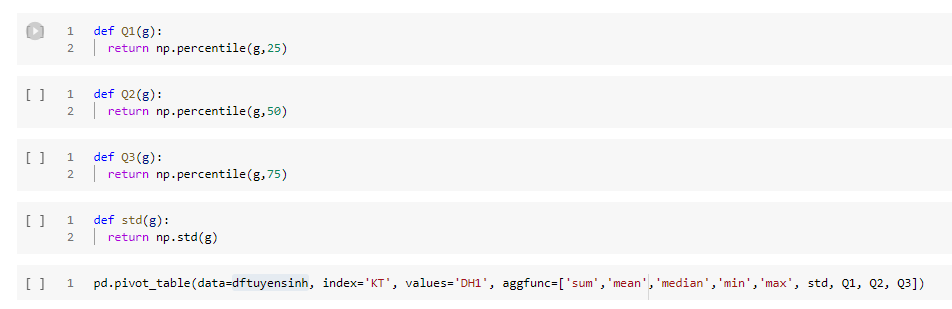

In [ ]:
# Tạo các hàm
def Q1(g):
  return np.percentile(g,25)
def Q2(g):
  return np.percentile(g,50)
def Q3(g):
  return np.percentile(g,75)
def std(g):
  return np.std(g)

In [ ]:
# thống kê các giái trị bằng group
groupKT_DH1= df.groupby(["KT"])["DH1"].agg(["count","sum", "mean", "median", "min", "max", std, Q1, Q2, Q3])
groupKT_DH1

,count,sum,mean,median,min,max,std,Q1,Q2,Q3
KT,,,,,,,,,,
A,49,163.50,3.336735,3.25,1.00,6.50,1.261226,2.2500,3.25,4.250
A1,6,17.50,2.916667,3.00,2.00,4.25,0.786165,2.1875,3.00,3.250
B,9,29.50,3.277778,3.50,1.75,4.50,0.776785,3.2500,3.50,3.750
C,14,79.25,5.660714,5.25,4.75,7.00,0.782665,5.0625,5.25,6.375
D1,22,84.25,3.829545,3.75,1.25,6.75,1.338644,3.0000,3.75,4.875


In [ ]:
#df.pivot_table(df[["DH1","KT"]],values= "DH1",index = "KT", aggfunc = ["sum", "mean", "median", "min", "max", std, Q1, Q2, Q3])

*4. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, sdt, Q1, Q2 và Q3 của DH1 theo KT và KV*

In [ ]:
# thống kê các giái trị bằng group
groupKT_KV_DH1= df.groupby(["KT","KV"])["DH1"].agg(["count","sum", "mean", "median", "min", "max", std, Q1, Q2, Q3])
groupKT_KV_DH1

count    sum      mean  median  ...       std      Q1     Q2      Q3
KT KV                                   ...                                 
A  1       29  93.75  3.232759   3.250  ...  1.345380  2.0000  3.250  4.2500
   2        9  31.75  3.527778   3.500  ...  1.346005  2.2500  3.500  4.2500
   2NT     11  38.00  3.454545   3.500  ...  0.871377  2.8750  3.500  4.1250
A1 1        2   4.75  2.375000   2.375  ...  0.375000  2.1875  2.375  2.5625
   2NT      4  12.75  3.187500   3.250  ...  0.797947  2.9375  3.250  3.5000
B  1        8  25.75  3.218750   3.375  ...  0.804650  3.0000  3.375  3.5625
   2NT      1   3.75  3.750000   3.750  ...  0.000000  3.7500  3.750  3.7500
C  1        8  43.50  5.437500   5.250  ...  0.681795  5.0000  5.250  5.4375
   2        2  11.50  5.750000   5.750  ...  0.750000  5.3750  5.750  6.1250
   2NT      4  24.25  6.062500   6.000  ...  0.817294  5.2500  6.000  6.8125
D1 1       13  46.75  3.596154   3.500  ...  1.215044  2.7500  3.500  4.2500
   2        8  33.75  4.218750   4.500  ...  1.512642  3.5625  4.500  5.0000
   2NT      1   3.75  3.750000   3.750  ...  0.000000  3.7500  3.750  3.7500

[13 rows x 10 columns]

In [ ]:
#df.pivot_table(df[["KT","KV","DH1"]],values= "DH1",index = "KT", aggfunc = ["sum", "mean", "median", "min", "max", std, Q1, Q2, Q3])

*5. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, sdt, Q1, Q2 và Q3 của DH1 theo KT, KV và DT*

In [ ]:
# thống kê các giái trị bằng group
groupKT_KV_DT_DH1= df.groupby(["KT","KV","DT"])["DH1"].agg(["count","sum", "mean", "median", "min", "max", std, Q1, Q2, Q3])
groupKT_KV_DT_DH1

count    sum      mean  median  ...       std      Q1     Q2      Q3
KT KV  DT                                   ...                                 
A  1   0.0     29  93.75  3.232759   3.250  ...  1.345380  2.0000  3.250  4.2500
   2   0.0      8  27.50  3.437500   3.000  ...  1.401729  2.2500  3.000  4.1875
       6.0      1   4.25  4.250000   4.250  ...  0.000000  4.2500  4.250  4.2500
   2NT 0.0     11  38.00  3.454545   3.500  ...  0.871377  2.8750  3.500  4.1250
A1 1   0.0      2   4.75  2.375000   2.375  ...  0.375000  2.1875  2.375  2.5625
   2NT 0.0      4  12.75  3.187500   3.250  ...  0.797947  2.9375  3.250  3.5000
B  1   0.0      8  25.75  3.218750   3.375  ...  0.804650  3.0000  3.375  3.5625
   2NT 0.0      1   3.75  3.750000   3.750  ...  0.000000  3.7500  3.750  3.7500
C  1   0.0      8  43.50  5.437500   5.250  ...  0.681795  5.0000  5.250  5.4375
   2   0.0      2  11.50  5.750000   5.750  ...  0.750000  5.3750  5.750  6.1250
   2NT 0.0      4  24.25  6.062500   6.000  ...  0.817294  5.2500  6.000  6.8125
D1 1   0.0     12  43.75  3.645833   3.625  ...  1.251908  2.6875  3.625  4.4375
       1.0      1   3.00  3.000000   3.000  ...  0.000000  3.0000  3.000  3.0000
   2   0.0      7  32.50  4.642857   4.500  ...  1.084445  4.1250  4.500  5.0000
       1.0      1   1.25  1.250000   1.250  ...  0.000000  1.2500  1.250  1.2500
   2NT 0.0      1   3.75  3.750000   3.750  ...  0.000000  3.7500  3.750  3.7500

[16 rows x 10 columns]

In [ ]:
#df.pivot_table(df[["KT","KV","DT","DH1"]] ,values= "DH1",index = ["KT"], aggfunc = ["sum", "mean", "median", "min", "max", std, Q1, Q2, Q3])

#**Phần 2:** 
Trình bày dữ liệu

1. Hãy trình bày dữ liệu biến:
> GT Gợi ý 
- Lập bảng tần số và tần suất 
- Vẽ biểu đồ tần số (cột), biểu đồ tần suất (tròn) và biểu đồ tích lũy tần suất (đa giác tích lũy)

2. Hãy trình bày dữ liệu lần lượt các biến: US_TBM1, US_TBM2 và US_TBM3
3. Hãy trình bày dữ liệu biến DT với các học sinh là nam
4. Hãy trình bày dữ liệu biến KV với các học sinh là nam thuộc dân tộc Kinh, có điểm thõa mãn điều kiện (DH1 >= 5.0 và DH2 >= 4.0 và DH3 >= 4.0)
5. Hãy trình bày dữ liệu lần lượt các biến DH1, DH2, DH3 lớn hơn bằng 5.0 và thuộc khu vực 2NT

*1.Hãy trình bày dữ liệu biến*

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc69e893d0>],
      dtype=object)

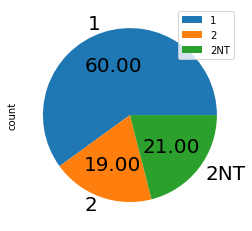

In [ ]:
# Thống kê số lượng theo từng khu vực
StaKV = df.groupby("KV")["KV"].agg(["count"])
StaKV.plot.pie(
    autopct="%.2f",
    fontsize=20,
    subplots=True,
    figsize=(8, 4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc695d3990>],
      dtype=object)

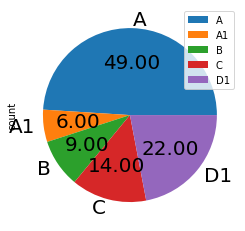

In [ ]:
# Thống kê theo số lượng theo từng khối thi
StaKT = df.groupby("KT")["KT"].agg(["count"])
StaKT.plot.pie(
    autopct="%.2f",
    fontsize=20,
    subplots=True,
    figsize=(8, 4))

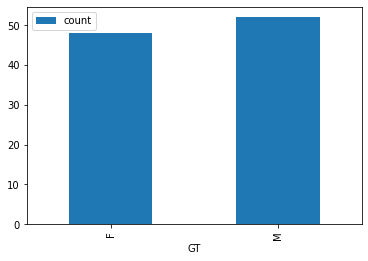

In [ ]:
#Thống kê số lượng theo giới tính
StaGT = df.groupby("GT")["GT"].agg(["count"])
StaGT.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc6900d750>],
      dtype=object)

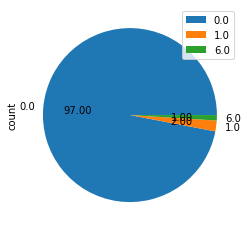

In [ ]:
# Thống kê theo số lượng theo từng Dân tộc
StaDT = df.groupby("DT")["DT"].agg(["count"])
StaDT.plot.pie(
    autopct="%.2f",
    subplots=True,
    figsize=(8, 4))

*2. Hãy trình bày dữ liệu lần lượt các biến: US_TBM1, US_TBM2 và US_TBM3*

In [ ]:
df["US_TBM1"]


STT
96    2.972
26    2.160
25    1.780
47    2.596
95    2.440
      ...  
12    2.972
48    3.068
7     1.960
3     2.308
98    2.820
Name: US_TBM1, Length: 100, dtype: float64

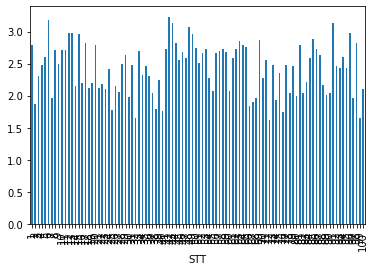

In [ ]:
#US_TBM1
#df["US_TBM1"].plot.pie()
df['US_TBM1'].plot.bar()

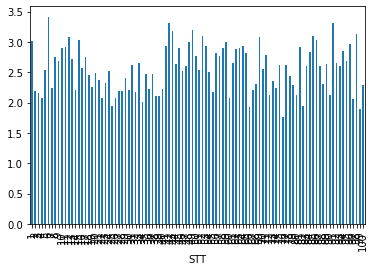

In [ ]:
#US_TBM2
#df["US_TBM2"].plot.pie()
df["US_TBM2"].plot.bar()

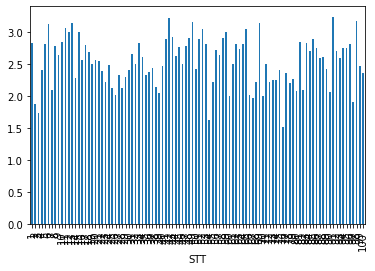

In [ ]:
#US_TBM3
#df["US_TBM3"].plot.pie()
df["US_TBM3"].plot.bar()

*3. Hãy trình bày dữ liệu biến DT với các học sinh là nam*

In [ ]:
def GT_M(d):
  for i in d:
    if i == "M":
      return True



In [ ]:
GTm=df[["GT","DT"]]
GTm

,GT,DT
STT,,
1,F,0.0
2,M,0.0
3,M,0.0
4,M,0.0
5,M,0.0
...,...,...
96,F,0.0
97,F,0.0
98,M,0.0


In [ ]:
DT_M = df.groupby(["DT","GT"])["GT"].agg(["count",GT_M])
DT_M

count  GT_M
DT  GT             
0.0 F      47  None
    M      50  True
1.0 F       1  None
    M       1  True
6.0 M       1  True

#**Phần 3:** 
Trực quan hóa dữ liệu theo nhóm phân loại

1. Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked 
> Gợi ý 
- Lọc dữ liệu giới tính là nữ 
- Oy: Chiều cao biểu đồ cột thể hiển số lượng học sinh theo xếp loại 
- Màu sắc thể hiện giá trị xếp loại: [Y, TB, K, G, XS] 
- Ox: thể hiện nhóm XL1, XL2 và XL3
2. Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2
3. Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi
4. Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi
5. Trực quan dữ liệu số lượng thí sinh đậu rớt trên từng nhóm khu vực.
6. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc
7. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính


#**Phần 4:** 
Trực quan hóa dữ liệu nâng cao

1. Vẽ biểu đồ đường Simple cho biến T1

2. Hãy tạo biến phân loại (phanlopt1) cho môn toán (T1) như sau:

> a. Từ 0 đến dưới 5 = kém (ký hiệu "k")

> b. Từ 5 đến dưới 7 = trung bình (ký hiệu "tb")

> c. Từ 7 đến dưới 8 = khá (ký hiệu "k")

> d. Từ 8 trở lên = giỏi (ký hiệu "g")

3. Lập bảng tần số cho biến phanloait1
4. Vẽ biểu đồ đường Multiple Line cho biến T1 được phân loại bởi biến phanlopt1

5. Vẽ biểu đồ Drop-line cho biến T1 được phân loại bởi biến phanlopt1


# **Phần 5:**
Mô tả dữ liệu và khảo sát dạng phân phối
> Gợi ý:
- Mô tả độ tập trung và phân tán của dữ liệu T1
- Vẽ biểu đồ Box-Plot và xác định các 10 đại lượng trong biểu đồ đó
- Mô tả hình dáng lệch của phân phối T1 dựa vào các đại lượng hướng tâm
- Vẽ biểu đồ Histogram biểu thị hình dáng phân phối
- Mô tả các đặc trưng của phân phối, mức độ lệch và mức độ nhọn -
- Kiểm chứng phân phối chuẩn QQ-Plot
- Nhận xét và đánh giá về phân phối của T1
2. Hãy mô tả và khảo sát phân phối cho biến T1 trên từng nhóm phân lớp (phanlopT1)
> Gợi ý:
- Trực quan hóa biểu đồ Box-plot, histogram và QQ-plot theo phân nhóm là giá trị của ‗phanlopT1‘.
3. Hãy khảo sát tương quan giữa biến DH1 theo biến T1 
> Gợi ý:
- Nhận xét giá trị Covariance hoặc Correlation
- Vẽ biểu đồ Scatter thể hiện liên hệ của biến phụ thuộc DH1 theo biến độc lập T1
4. Hãy khảo sát tương quan giữa biến DH1 theo biến T1 trên từng nhóm khu vực
5. Hãy khảo sát tương quan giữa các biến DH1, DH2, DH3
> Gợi ý:
- Nhận xét ma trận hiệp phương sai hoặc ma trận tương quan
- Vẽ biểu đồ Scatter giữa các biến
